## **Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import sklearn
import scipy

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', dist='minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.dist = dist
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        
        if self.algorithm == 'brute': 
            #dists = scipy.spatial.distance.cdist(X, self.X, metric=self.dist)
#строчка вверху, если нельзя использовать строчку ниже. Разницы в том, что строчка ниже поддерживает src матрицы
#тогда можно не сокращать кол-во признаков(иначе падает по памяти занятой). 
#А еще верхняя функция сильно медленнее считает, поэтому остановимся на нижней, но если поменять - программа также 
#будет работать(и скор примерно одинаковый), просто медленнее
            dists = sklearn.metrics.pairwise.pairwise_distances(X, self.X, metric=self.dist)
            temp = np.argpartition(dists, self.n_neighbors, axis=1)[:,:self.n_neighbors]
            temp2 = self.y[temp]
            ans = [np.argmax(np.bincount(war)) for war in temp2]
        if self.algorithm == 'kd_tree':
            tree = sklearn.neighbors.KDTree(self.X)
            _, temp = tree.query(X, self.n_neighbors)
            temp2 = self.y[temp]
            ans = [np.argmax(np.bincount(war)) for war in temp2]
            
        return ans
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 2.23 ms, total: 2.23 ms
Wall time: 1.59 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 15.3 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 3.21 ms, sys: 191 µs, total: 3.4 ms
Wall time: 2.57 ms


array([0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 3.36 ms, sys: 347 µs, total: 3.71 ms
Wall time: 2.1 ms


[0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0]

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 4.65 ms, sys: 54 µs, total: 4.7 ms
Wall time: 3.05 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 22.9 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 6.42 ms, sys: 0 ns, total: 6.42 ms
Wall time: 4.44 ms


array([0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 562 µs, sys: 3.73 ms, total: 4.29 ms
Wall time: 2.74 ms


[0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2]

In [114]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [115]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [116]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [207]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000, max_df=0.1)
X = vectorizer.fit_transform(data)
X = X.toarray()

In [7]:
    #Вариант вместо предыдущей ячейки, если использовать в KNN pairwise, который поддерживает crs матрицы:
    #Точность у меня поулчалась примерно такая же
#vectorizer = CountVectorizer(max_df=0.1)
#X = vectorizer.fit_transform(data)



*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 3, shuffle = False)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

### Я использовал euclidean, потому что она счиатется сильно быстрее чем minkowski, которая в оригинале KNN используется + вы сами выше в задании пишете про евклидовую метрику.


In [208]:
%%time
vals = []
for i in range(1,101,5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', dist='euclidean')
    score = []
    count = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        score.append(accuracy_score(y_test, my_clf_pred))
    vals.append(np.array(score).mean())
print(vals)


[0.2779734300922961, 0.22777055535074045, 0.2130101360506532, 0.207618530994898, 0.19966359706487313, 0.19409546201926686, 0.1875552286012985, 0.1834009973042209, 0.18110306098737375, 0.1743856882897977, 0.16864060143835502, 0.16899429414203518, 0.1667844001950102, 0.16528165731313152, 0.16475148148804306, 0.1609508725919814, 0.15812261984471734, 0.1572387278817273, 0.15458712229542135, 0.15502934948757324]
CPU times: user 18min 57s, sys: 13.7 s, total: 19min 10s
Wall time: 5min 33s


<function matplotlib.pyplot.show(close=None, block=None)>

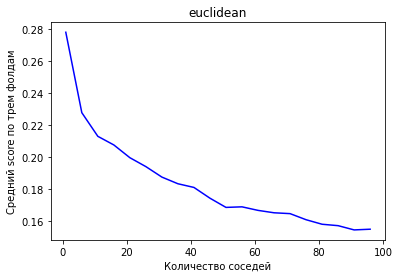

In [209]:
plt.plot(range(1, 101, 5), vals, 'b')
plt.title('euclidean')
plt.ylabel('Средний score по трем фолдам')
plt.xlabel('Количество соседей')
plt.show
#1 наилучший результат

In [210]:
vals2 = []
for i in range(1,101, 5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', dist='cosine')
    score = []
    count = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        score.append(accuracy_score(y_test, my_clf_pred))
    vals2.append(np.array(score).mean())
print(vals2)

[0.5290793144346648, 0.5540033664665103, 0.5653169398768804, 0.5785751552821813, 0.5847625630626615, 0.5890931368758189, 0.5929824911683449, 0.5945730889462747, 0.5989922909847895, 0.5969597472253648, 0.597489852747789, 0.5979317752950627, 0.5996992780103859, 0.5989041548780816, 0.5982852570907502, 0.5982854679987428, 0.5982852102223073, 0.5959872739054601, 0.5973131118499453, 0.5974901573926673]


<function matplotlib.pyplot.show(close=None, block=None)>

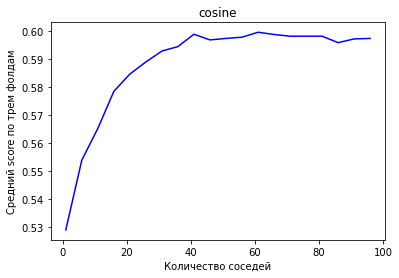

In [211]:
plt.plot(range(1, 101, 5), vals2, 'b')
plt.title('cosine')
plt.ylabel('Средний score по трем фолдам'),
plt.xlabel('Количество соседей')
plt.show
#примерно 60 наилучший результат

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, max_df=0.1)
X1 = vectorizer.fit_transform(data)

In [201]:
X1 = X1.toarray()

In [180]:
vals3 = []
for i in range(1,101,5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', dist='cosine')
    score = []
    count = 0
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        score.append(accuracy_score(y_test, my_clf_pred))
    vals3.append(np.array(score).mean())
print(vals3)

[0.5867953645985217, 0.6192332247766461, 0.644599996119293, 0.6550294432244589, 0.6582997825585464, 0.6597140378203962, 0.6617465815798208, 0.6604213763593137, 0.661747167435356, 0.663603204639151, 0.6639562411846317, 0.6620121616110146, 0.6604211185828782, 0.6633379292528354, 0.6621004148888295, 0.6613051042827539, 0.659360345116716, 0.6582996888216607, 0.6586534049595624, 0.657150568340798]


<function matplotlib.pyplot.show(close=None, block=None)>

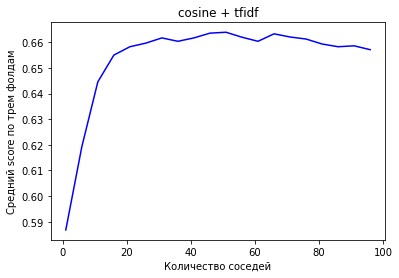

In [228]:
plt.plot(range(1, 101,5), vals3, 'b')
plt.title('cosine + tfidf')
plt.ylabel('Средний score по трем фолдам')
plt.xlabel('Количество соседей')
plt.show
#51 лучшее

In [182]:
vals4 = []
for i in range(1,101,5):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', dist='euclidean')
    score = []
    count = 0
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train, y_train)
        my_clf_pred = my_clf.predict(X_test)
        score.append(accuracy_score(y_test, my_clf_pred))
    vals4.append(np.array(score).mean())
print(vals4)

[0.16059757827006516, 0.09916928965906864, 0.08608793232271848, 0.08113839041956535, 0.07689609331844417, 0.07424451116635965, 0.0715929524484965, 0.06690852189210904, 0.06461053870681904, 0.06487543914559203, 0.06284245013596067, 0.06452167613924764, 0.06584756095217553, 0.065317150784873, 0.06142805426878245, 0.06036784322393395, 0.062312321179315004, 0.0612517117527026, 0.06036770261860552, 0.060102614706061284]


<function matplotlib.pyplot.show(close=None, block=None)>

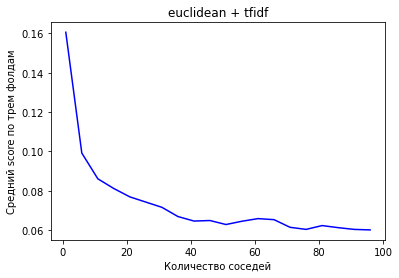

In [183]:
plt.plot(range(1, 101,5), vals4, 'b')
plt.title('euclidean + tfidf')
plt.ylabel('Средний score по трем фолдам')
plt.xlabel('Количество соседей')
plt.show

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [202]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [229]:
data_ans = newsgroups['data']
target_ans = newsgroups['target']
X2 = vectorizer.transform(data_ans)

In [230]:
X2 = X2.toarray()

In [233]:
my_clf = MyKNeighborsClassifier(n_neighbors=51, algorithm='brute', dist='cosine')
my_clf.fit(X1, target)
my_clf_pred = my_clf.predict(X2)
ansss = accuracy_score(target_ans, my_clf_pred)

In [234]:
print(ansss)

0.5908125331917153


### Скор стал хуже, но не очень сильно. Стало хуже потому что я кол-во соседей и кол-во фич подбирал под трейн данные, а нам дается тест дата. Поэтому некоторые гиперпарамтеры подобраны под трейн, а не тест.